 # Tests on PDA

In [1]:
import sys
sys.path[0:0] = ['../..']        # Append to the beginning of the search path
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



__IMPORTANT: Must time-bound explore-pda, run-pda, explore-tm, etc so that loops are caught__

In [2]:
repda = md2mc('''PDA
!!R -> R R | R + R | R* | ( R ) | 0 | 1 | e
I : '', #  ; R#  -> M
M : '', R  ; RR  -> M
M : '', R  ; R+R -> M
M : '', R  ; R*  -> M
M : '', R  ; (R) -> M
M : '', R  ; 0   -> M
M : '', R  ; 1   -> M
M : '', R  ; e   -> M
M : 0,  0  ; ''  -> M
M : 1,  1  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : e,  e  ; ''  -> M
M : '', #  ; #   -> F
'''
)


In [3]:
repda

{'Delta': {('I', '', '#'): {('M', 'R#')},
  ('M', '', '#'): {('F', '#')},
  ('M', '', 'R'): {('M', '(R)'),
   ('M', '0'),
   ('M', '1'),
   ('M', 'R*'),
   ('M', 'R+R'),
   ('M', 'RR'),
   ('M', 'e')},
  ('M', '(', '('): {('M', '')},
  ('M', ')', ')'): {('M', '')},
  ('M', '+', '+'): {('M', '')},
  ('M', '0', '0'): {('M', '')},
  ('M', '1', '1'): {('M', '')},
  ('M', 'e', 'e'): {('M', '')}},
 'F': {'F'},
 'Gamma': {'#', '(', ')', '*', '+', '0', '1', 'R', 'e'},
 'Q': {'F', 'I', 'M'},
 'Sigma': {'(', ')', '+', '0', '1', 'e'},
 'q0': 'I',
 'z0': '#'}

In [4]:
DO_repda = dotObj_pda(repda, FuseEdges=True)

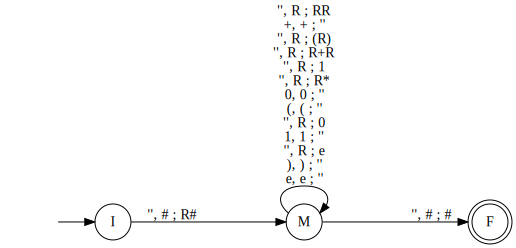

In [5]:
DO_repda

In [6]:
explore_pda("0", repda, STKMAX=4)

String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [8]:
explore_pda("00", repda)

KeyboardInterrupt: 

In [ ]:
explore_pda("(0)", repda)

In [ ]:
explore_pda("(00)", repda)

In [ ]:
explore_pda("(0)(0)", repda)

In [ ]:
explore_pda("(0)(0)", repda)

In [ ]:
explore_pda("0+0", repda, STKMAX=3)

In [ ]:
explore_pda("0+0", repda)

In [ ]:
explore_pda("(0)(0)", repda)

In [ ]:
explore_pda("(0)+(0)", repda)

In [ ]:
explore_pda("00+0", repda)

In [ ]:
explore_pda("000", repda, STKMAX=3)

In [ ]:
explore_pda("00+00", repda, STKMAX=4)

In [ ]:
explore_pda("00+00", repda, STKMAX=5)

In [ ]:
explore_pda("0000+0", repda, STKMAX=5)

In [ ]:
brpda = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; e     -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : e,  e  ; ''    -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda, FuseEdges=True)


In [ ]:
explore_pda("(e)", brpda, STKMAX=3)

In [ ]:
brpda1 = md2mc('''PDA
 I : '', '' ; S     -> M
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; ''    -> M
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 M : '',  ''  ; ''  -> M
 M : '', #  ; ''    -> F''')
dotObj_pda(brpda1, FuseEdges=True)

In [ ]:
explore_pda("('')", brpda1, STKMAX=0)

In [ ]:
brpda2 = md2mc('''PDA
 I : a, #; '' -> I
 I : '', '' ; '' -> I''')
dotObj_pda(brpda2, FuseEdges=True)

In [ ]:
explore_pda("a", brpda2, STKMAX=1)

In [ ]:
explore_pda("a", brpda1, STKMAX=1)

In [ ]:
brpda3 = md2mc('''PDA
 I : a, #; '' -> I
 I : '', '' ; b -> I''')
dotObj_pda(brpda3, FuseEdges=True)

In [ ]:
explore_pda("a", brpda3, STKMAX=7)

In [ ]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [ ]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [ ]:
DOpdaEamb.source

In [ ]:
explore_pda("3+2*3", pdaEamb, STKMAX=5)

In [ ]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=7)

In [ ]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [ ]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [ ]:
DOpdaE.source

In [ ]:
explore_pda("2+2*3", pdaE, STKMAX=7)

In [ ]:
explore_pda("3+2*3+2*3", pdaE, STKMAX=7)

In [ ]:
explore_pda("3*2*~3+~~3*~3", pdaE, STKMAX=10)

In [ ]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=8)